In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [304]:
def f_function(x):
    # return 1
    # return (1+x)
    # return ((np.pi**2)*np.sin(np.pi*x))
    return ((np.pi**2)*np.sin(np.pi*x)) + np.sin(np.pi*x)

def epsilon_function(x):
    return 1

def gamma_function(x):
    return 1

# giving gaussina points details
def gauss_pt_details(no_of_gauss_pt):
    if no_of_gauss_pt==1:
        gauss_pt = np.array([0])
        weights = np.array([2])
        return gauss_pt, weights
    
    if no_of_gauss_pt == 2:
        gauss_pt = np.array([-1*np.sqrt(1/3), np.sqrt(1/3)])
        weights = np.array([1,1])
        return gauss_pt, weights
    
    if no_of_gauss_pt == 3:
        gauss_pt = np.array([-1*np.sqrt(3/5), 0, np.sqrt(3/5)])
        weights = np.array([5/9, 8/9, 5/9])
        return gauss_pt, weights

# function to generate and assemble the corase grid matrices 
def matrix_cal_1D(mesh, coordinates, no_of_gauss_pts = 3):

    K = np.zeros((coordinates.shape[0], coordinates.shape[0]))
    M = np.zeros((coordinates.shape[0], coordinates.shape[0]))
    F = np.zeros((coordinates.shape[0],1))

    for ele in range(mesh.shape[0]):
        con = mesh[ele:ele+1]
        coord = coordinates[con]

        gauss_pts_KM, weights_KM = gauss_pt_details(no_of_gauss_pts)

        k = np.zeros((2,2))
        m = np.zeros((2,2))
        f = np.zeros((2,1))
        
        for j in range(no_of_gauss_pts):
            gauss_pt = gauss_pts_KM[j]
            weight = weights_KM[j]

            N = np.array([[(1-gauss_pt)/2, (1+gauss_pt)/2]])
            dN = np.array([[-1/2, 1/2]])
            J = dN.dot(coord.T)
            dphi = np.linalg.inv(J).dot(dN)
            X = N.dot(coord.T)

            f += (N.T)*f_function(X)*np.linalg.det(J)*weight
            k += (dphi.T.dot(dphi))*epsilon_function(X)*np.linalg.det(J)*weight
            m += (N.T.dot(N))*gamma_function(X)*np.linalg.det(J)*weight
        Zeros = np.zeros((con.shape[0],)).astype(int)
        
        F[np.ix_(con[0],Zeros)] +=  f
        K[np.ix_(con[0], con[0])] += k
        M[np.ix_(con[0], con[0])] += m

    F = np.squeeze(F)

    return K, M, F

In [305]:
# def elemental_matrix_cal_1D(no_of_additional_scales, coord, no_of_gauss_pts = 3):

#     total_nodes = 2**(no_of_additional_scales) + 1

#     K = np.zeros((total_nodes, total_nodes))
#     M = np.zeros((total_nodes, total_nodes))
#     F = np.zeros((total_nodes,))
#     coordinates = np.zeros((total_nodes-2,))

#     dN = np.array([[-1/2, 1/2]])
#     J = dN.dot(coord.T)

#     M[0:2, 0:2] = np.array([[2/3, 1/3], [1/3, 2/3]])
#     K[0:2, 0:2] = np.array([[1/2, -1/2], [-1/2, 1/2]])
#     for l in range(no_of_additional_scales):
#         for j in range(2**l):
#             M[0][2**l + j + 1] = (1/2)**(l) - ((2*j + 1)/2**(2*l+1))
#             M[2**l + j + 1][0] = (1/2)**(l) - ((2*j + 1)/2**(2*l+1))
#             M[1][2**l + j + 1] = ((2*j + 1)/2**(2*l+1))
#             M[2**l + j + 1][1] = ((2*j + 1)/2**(2*l+1))

#     diagonal_ele = 4/3
#     for i in range(2, total_nodes):
#         cur_level_i = np.ceil(np.log2(i))
#         curr_j = i
#         cur_relative_level_j = 0
 
#         while curr_j <= total_nodes:
#             if cur_relative_level_j == 0:
#                 M[i][curr_j] = diagonal_ele/(2**cur_level_i)
#                 K[i][i] = 2**cur_level_i
#             else:
#                 for u in range(2**(cur_relative_level_j-1)):
#                     M[i][curr_j - u] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[curr_j - u][i] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[i][curr_j - (2**cur_relative_level_j) + 1 + u] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[curr_j - (2**cur_relative_level_j) + 1 + u][i] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#             curr_j *= 2
#             cur_relative_level_j += 1
    
#     M = M*np.linalg.det(J)
#     K = K/(np.linalg.det(J))
#     gauss_pts, weights = gauss_pt_details(no_of_gauss_pts)
    
#     for l in range(no_of_additional_scales):
#         left_bou = -1
#         mid_bou = left_bou + (1/2**l)
#         right_bou = mid_bou + (1/2**l)
#         for j in range(2**l):
            
#             sub_coord_1 = (np.array([[(1-left_bou)/2, (1+left_bou)/2], [(1-mid_bou)/2, (1+mid_bou)/2]]).dot(coord.T)).T
#             sub_coord_2 = (np.array([[(1-mid_bou)/2, (1+mid_bou)/2], [(1-right_bou)/2, (1+right_bou)/2]]).dot(coord.T)).T
#             coordinates[2**l + j - 1] = sub_coord_1[0][1]
#             # print(sub_coord_1, sub_coord_2, "\n")

#             for pt_id in range(weights.shape[0]):
#                 N = np.array([[(1-gauss_pts[pt_id])/2, (1+gauss_pts[pt_id])/2]])
#                 dN = np.array([[-1/2, 1/2]])
#                 sub_J_1 = dN.dot(sub_coord_1.T)
#                 sub_J_2 = dN.dot(sub_coord_2.T)
#                 X1 = N.dot(sub_coord_1.T)
#                 X2 = N.dot(sub_coord_2.T)
#                 # print((float(N[0][1]))*f_function(X1[0][0])*np.linalg.det(sub_J_1)*weights[pt_id])
#                 F[2**l + j + 1] += (float(N[0][1]))*f_function(X1[0][0])*np.linalg.det(sub_J_1)*weights[pt_id]
#                 F[2**l + j + 1] += (float(N[0][0]))*f_function(X2[0][0])*np.linalg.det(sub_J_2)*weights[pt_id]

#             left_bou += (1/2**(l-1))
#             mid_bou += (1/2**(l-1))
#             right_bou += (1/2**(l-1))
#     return K, M, F, coordinates

# elemental_matrix_cal_1D(3,np.array([[0,1]]))

In [306]:
def elemental_matrix_cal_1D(no_of_additional_scales, coord, no_of_gauss_pts = 3):
    # total number of nodes
    total_nodes = 2**(no_of_additional_scales) + 1

    K = np.zeros((total_nodes, total_nodes))
    M = np.zeros((total_nodes, total_nodes))
    F = np.zeros((total_nodes,))
    coordinates = np.zeros((total_nodes-2,))

    gauss_pts, weights = gauss_pt_details(no_of_gauss_pts)

    dN = np.array([[-1/2, 1/2]])
    J = dN.dot(coord.T)

    # Calculating the corase grid for given element
    for pt_id in range(weights.shape[0]):
        N = np.array([[(1-gauss_pts[pt_id])/2, (1+gauss_pts[pt_id])/2]])
        dphi = np.linalg.inv(J).dot(dN)
        X = N.dot(coord.T)
        F[:2] += np.squeeze((N.T)*f_function(X)*np.linalg.det(J)*weights[pt_id])
        K[:2, :2] += (dphi.T.dot(dphi))*epsilon_function(X)*np.linalg.det(J)*weights[pt_id]
        M[:2, :2] += (N.T.dot(N))*gamma_function(X)*np.linalg.det(J)*weights[pt_id]
    

    for l1 in range(no_of_additional_scales):
        for j1 in range(2**(l1)):

            # Finding active region for first pseduo-wavelet shape function
            left_bou_1 = ((2**(1-l1))*j1)-1
            center_1 = ((2**(1-l1))*j1) + (2**(-l1)) - 1
            right_bou_1 = ((2**(1-l1))*j1) + (2**(1-l1)) - 1
            
            # finding the real coordinates of active region
            sub_coord_1_1 = (np.array([[(1-left_bou_1)/2, (1+left_bou_1)/2], [(1-center_1)/2, (1+center_1)/2]]).dot(coord.T)).T
            sub_coord_1_2 = (np.array([[(1-center_1)/2, (1+center_1)/2], [(1-right_bou_1)/2, (1+right_bou_1)/2]]).dot(coord.T)).T
            coordinates[(2**l1) + j1 -1] = sub_coord_1_1[0][1]

            # Finding matricies for interaction between first pseudo shape fucntion and corase grid elements with numerical integrations
            for pt_id in range(weights.shape[0]):
                N = np.array([[(1-gauss_pts[pt_id])/2, (1+gauss_pts[pt_id])/2]])
                dN = np.array([[-1/2, 1/2]])
                X1_1 = (N.dot(sub_coord_1_1.T))[0][0]
                X1_2 = (N.dot(sub_coord_1_2.T))[0][0]
                sub_J_1_1 = dN.dot(sub_coord_1_1.T)
                sub_J_1_2 = dN.dot(sub_coord_1_2.T)

                M[0][(2**l1) + j1 + 1] += ((X1_1 - coord[0][1])/(coord[0][0]-coord[0][1]))*((X1_1 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*gamma_function(X1_1)*np.linalg.det(sub_J_1_1)*weights[pt_id]
                M[0][(2**l1) + j1 + 1] += ((X1_2 - coord[0][1])/(coord[0][0]-coord[0][1]))*((X1_2 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*gamma_function(X1_2)*np.linalg.det(sub_J_1_2)*weights[pt_id]
                M[1][(2**l1) + j1 + 1] += ((X1_1 - coord[0][0])/(coord[0][1]-coord[0][0]))*((X1_1 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*gamma_function(X1_1)*np.linalg.det(sub_J_1_1)*weights[pt_id]
                M[1][(2**l1) + j1 + 1] += ((X1_2 - coord[0][0])/(coord[0][1]-coord[0][0]))*((X1_2 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*gamma_function(X1_2)*np.linalg.det(sub_J_1_2)*weights[pt_id]
                
                K[0][(2**l1) + j1 + 1] += (np.linalg.inv(J)[0][0]*dN[0][0])*(np.linalg.inv(sub_J_1_1)[0][0]*dN[0][1])*epsilon_function(X1_1)*np.linalg.det(sub_J_1_1)*weights[pt_id]
                K[0][(2**l1) + j1 + 1] += (np.linalg.inv(J)[0][0]*dN[0][0])*(np.linalg.inv(sub_J_1_2)[0][0]*dN[0][0])*epsilon_function(X1_2)*np.linalg.det(sub_J_1_2)*weights[pt_id] 
                K[1][(2**l1) + j1 + 1] += (np.linalg.inv(J)[0][0]*dN[0][1])*(np.linalg.inv(sub_J_1_1)[0][0]*dN[0][1])*epsilon_function(X1_1)*np.linalg.det(sub_J_1_1)*weights[pt_id]
                K[1][(2**l1) + j1 + 1] += (np.linalg.inv(J)[0][0]*dN[0][1])*(np.linalg.inv(sub_J_1_2)[0][0]*dN[0][0])*epsilon_function(X1_2)*np.linalg.det(sub_J_1_2)*weights[pt_id] 

                F[(2**l1) + j1 + 1] += ((X1_1 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*f_function(X1_1)*np.linalg.det(sub_J_1_1)*weights[pt_id]
                F[(2**l1) + j1 + 1] += ((X1_2 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*f_function(X1_2)*np.linalg.det(sub_J_1_2)*weights[pt_id]

            M[(2**l1) + j1 + 1][1] = M[1][(2**l1) + j1 + 1]
            M[(2**l1) + j1 + 1][0] = M[0][(2**l1) + j1 + 1] 
            K[(2**l1) + j1 + 1][1] = K[1][(2**l1) + j1 + 1]
            K[(2**l1) + j1 + 1][0] = K[0][(2**l1) + j1 + 1] 


            for l2 in range(l1, no_of_additional_scales):
                for j2 in range(2**(l2)):

                    # finding active region of 2nd pseudo-wavelet function
                    left_bou_2 = ((2**(1-l2))*j2)-1
                    center_2 = ((2**(1-l2))*j2) + (2**(-l2)) - 1
                    right_bou_2 = ((2**(1-l2))*j2) + (2**(1-l2)) - 1
                    
                    # finding if two wavelets are interacting with eachother or not
                    if (left_bou_1 <= left_bou_2) & (right_bou_1 >= right_bou_2):
                        dN = np.array([[-1/2, 1/2]])
                        sub_coord_2_1 = (np.array([[(1-left_bou_2)/2, (1+left_bou_2)/2], [(1-center_2)/2, (1+center_2)/2]]).dot(coord.T)).T
                        sub_coord_2_2 = (np.array([[(1-center_2)/2, (1+center_2)/2], [(1-right_bou_2)/2, (1+right_bou_2)/2]]).dot(coord.T)).T

                        # finding the matricies values by interacting with 1st and 2nd pseudo wavelet shape functions
                        for pt_id in range(weights.shape[0]):
                            N = np.array([[(1-gauss_pts[pt_id])/2, (1+gauss_pts[pt_id])/2]])
                            dN = np.array([[-1/2, 1/2]])
                            
                            X_1 = (N.dot(sub_coord_2_1.T))[0][0]
                            X_2 = (N.dot(sub_coord_2_2.T))[0][0]
                            
                            sub_J_2_1 = dN.dot(sub_coord_2_1.T)
                            sub_J_2_2 = dN.dot(sub_coord_2_2.T)
                            
                            if center_1 >= right_bou_2:
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_1 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*((X_1 - sub_coord_2_1[0][0])/(sub_coord_2_1[0][1] - sub_coord_2_1[0][0]))*gamma_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_2 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*((X_2 - sub_coord_2_2[0][1])/(sub_coord_2_2[0][0] - sub_coord_2_2[0][1]))*gamma_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_1)[0][0]*dN[0][1])*(np.linalg.inv(sub_J_2_1)[0][0]*dN[0][1])*epsilon_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_1)[0][0]*dN[0][1])*(np.linalg.inv(sub_J_2_2)[0][0]*dN[0][0])*epsilon_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]

                            elif center_1 <= left_bou_2:
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_1 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*((X_1 - sub_coord_2_1[0][0])/(sub_coord_2_1[0][1] - sub_coord_2_1[0][0]))*gamma_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_2 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*((X_2 - sub_coord_2_2[0][1])/(sub_coord_2_2[0][0] - sub_coord_2_2[0][1]))*gamma_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_2)[0][0]*dN[0][0])*(np.linalg.inv(sub_J_2_1)[0][0]*dN[0][1])*epsilon_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_2)[0][0]*dN[0][0])*(np.linalg.inv(sub_J_2_2)[0][0]*dN[0][0])*epsilon_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]

                            else:
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_1 - sub_coord_1_1[0][0])/(sub_coord_1_1[0][1] - sub_coord_1_1[0][0]))*((X_1 - sub_coord_2_1[0][0])/(sub_coord_2_1[0][1] - sub_coord_2_1[0][0]))*gamma_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                M[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += ((X_2 - sub_coord_1_2[0][1])/(sub_coord_1_2[0][0] - sub_coord_1_2[0][1]))*((X_2 - sub_coord_2_2[0][1])/(sub_coord_2_2[0][0] - sub_coord_2_2[0][1]))*gamma_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_1)[0][0]*dN[0][1])*(np.linalg.inv(sub_J_2_1)[0][0]*dN[0][1])*epsilon_function(X_1)*np.linalg.det(sub_J_2_1)*weights[pt_id]
                                K[(2**l1) + j1 + 1][(2**l2) + j2 + 1] += (np.linalg.inv(sub_J_1_2)[0][0]*dN[0][0])*(np.linalg.inv(sub_J_2_2)[0][0]*dN[0][0])*epsilon_function(X_2)*np.linalg.det(sub_J_2_2)*weights[pt_id]


                            M[(2**l2) + j2 + 1][(2**l1) + j1 + 1] = M[(2**l1) + j1 + 1][(2**l2) + j2 + 1]
                            K[(2**l2) + j2 + 1][(2**l1) + j1 + 1] = K[(2**l1) + j1 + 1][(2**l2) + j2 + 1]

    return K, M, F, coordinates

elemental_matrix_cal_1D(3,np.array([[0,1]]), no_of_gauss_pts=3)

(array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 16.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 16.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 16.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 16.]]),
 array([[0.33333333, 0.16666667, 0.25      , 0.1875    , 0.0625    ,
         0.109375  , 0.078125  , 0.046875  , 0.015625  ],
        [0.16666667, 0.33333333, 0.25      , 0.0625    , 0.1875    ,
         0.015625  , 0.046875  , 0.078125  , 0.109375  ],
        [0.25      , 0.25      , 0.33333333, 0.125     , 0.125     ,
         0.03125   , 0.09375   , 0.09375   , 0.03125   ],
        [0.1875    , 0.0625    , 0.125     , 0.16666667, 0.        ,
         0.0625    , 0.0625    , 0.        , 0.      

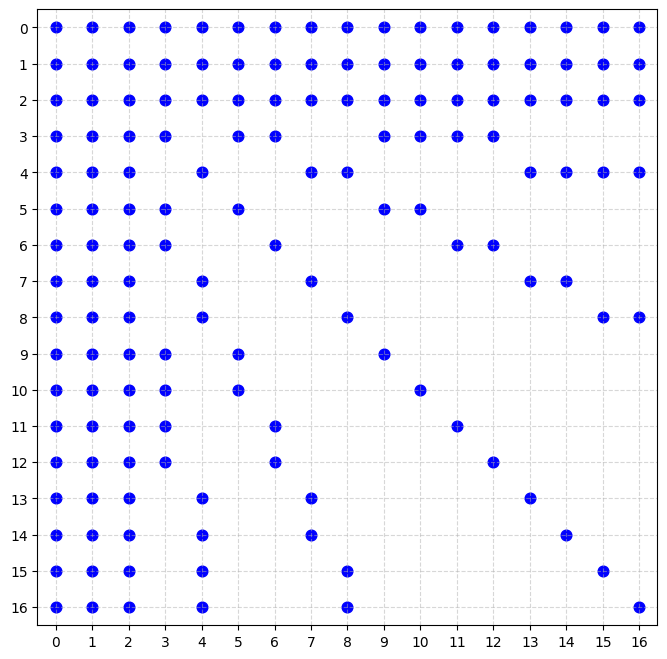

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def plot_nonzero_entries(array):
    """
    Visualize nonzero elements of a 2D numpy array.

    Args:
        array (np.ndarray): 2D numpy array to visualize.
    """
    # Find the indices of nonzero elements
    nonzero_indices = np.argwhere(array != 0)
    matrix_size = max(array.shape)
    dot_size = 1000 / matrix_size  # Adjust scale for dot size

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Scatter plot for nonzero entries
    ax.scatter(nonzero_indices[:, 1], nonzero_indices[:, 0], color="blue", s=dot_size, label="Nonzero elements")

    # Annotate with values
    # for (row, col) in nonzero_indices:
    #     ax.text(col, row, f"{array[row, col]}", fontsize=12, ha="center", va="center", color="black")

    # Set plot limits and grid
    ax.set_xlim(-0.5, array.shape[1] - 0.5)
    ax.set_ylim(-0.5, array.shape[0] - 0.5)
    ax.set_xticks(range(array.shape[1]))
    ax.set_yticks(range(array.shape[0]))
    ax.invert_yaxis()  # Ensure (0, 0) is at the top-left corner
    ax.grid(True, linestyle="--", alpha=0.5)

    # # Title and labels
    # ax.set_title("Nonzero Entries in 2D Array", fontsize=16)
    # ax.set_xlabel("Columns", fontsize=14)
    # ax.set_ylabel("Rows", fontsize=14)
    # ax.legend()

    plt.show()


plot_nonzero_entries(elemental_matrix_cal_1D(4,np.array([[0,1]]), no_of_gauss_pts=3)[1])


In [372]:
def find_varible_values(mesh, coordinates, wavelet_level):
    # finding M, K, F matrix for corase grid
    K, M, F = matrix_cal_1D(mesh, coordinates, 3)
    U = np.zeros(F.shape)

    # applying appropriate boundary conditions
    U[1:-1] = np.linalg.inv((M[1:-1, 1:-1]) + (K[1:-1, 1:-1])).dot(F[1:-1])

    final_coordinate = coordinates
    final_U = U

    # solving for finer layers in elements
    for ele in range(mesh.shape[0]):
        con = mesh[ele:ele+1]
        coord = coordinates[con]
        U_end = U[con]

        # getting elemental matrices
        K_ele, M_ele, F_ele, coordinates_ele = elemental_matrix_cal_1D(wavelet_level, coord, 3)

        delta_u = np.zeros(F_ele.shape)
        U_ele = np.zeros(F_ele.shape)

        # solving for delta u
        U_ele[:2] = U_end[0]
        delta_u[:2] = U_end[0]
        delta_u[2:] = np.linalg.inv((M_ele[2:, 2:]) + (K_ele[2:, 2:])).dot(F_ele[2:]-(((M_ele[2:, :2]) + (K_ele[2:, :2])).dot(U_ele[:2])))
        
        # assembly to get final nodal values
        for l in range(wavelet_level):
            for j in range(2**l):
                curr = 2**l + j + 1
                l1 = 0
                while curr <= (2**wavelet_level) + 1:
                    if l1 == 0:
                        U_ele[curr] += delta_u[curr]
                        U_ele[curr] += ((2*j + 1)/2**(l+1))*delta_u[1]
                        U_ele[curr] += (1 - ((2*j + 1)/2**(l+1)))*delta_u[0]
                    else:
                        for u in range(2**(l1-1)):
                            U_ele[curr - u] += ((2*u + 1)/(2**(l1)))*delta_u[2**l + j + 1]
                            U_ele[curr - (2**l1) + 1 + u] += ((2*u + 1)/(2**(l1)))*delta_u[2**l + j + 1]
                    curr *= 2
                    l1 += 1
        # print(np.linalg.norm(delta_u[-2**(wavelet_level-1)])/ np.linalg.norm(U_ele[-2**(wavelet_level-1)]))
        final_coordinate = np.concatenate((final_coordinate, coordinates_ele))
        final_U = np.concatenate((final_U, U_ele[2:]))

    sorted_indicies = np.argsort(final_coordinate)
    final_coordinate = final_coordinate[sorted_indicies]
    final_U = final_U[sorted_indicies]

    return final_coordinate, final_U


final_coordinates, final_U = find_varible_values(np.array([[0, 1], [1,2]]), np.array([0, 1, 2]), 2)

In [351]:
# plt.plot(final_coordinates, final_U)
# print(final_U)

for i in range(1, 10):
    final_coordinates, final_U = find_varible_values(np.array([[0, 1]]), np.array([0, 1]), i)



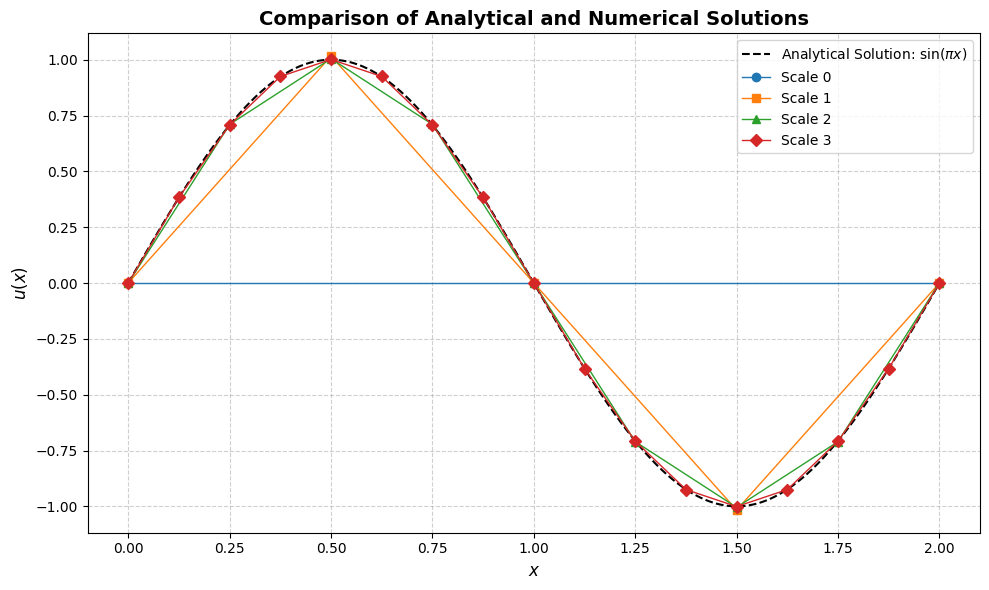

In [376]:
import numpy as np
import matplotlib.pyplot as plt

# Example function definition (replace with your actual function)
def my_function(i):
    # Replace this with the actual logic to compute final_U and final_coordinates
    x = np.linspace(0, 1, i + 1)  # Example of coordinates
    final_U = np.sin(np.pi * x) + np.random.uniform(-0.1, 0.1, size=len(x))  # Perturbed solution
    return final_U, x

# Number of iterations
n = 5

# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Generate analytical solution for a smooth plot
analytical_x = np.linspace(0, 2, 1000)
analytical_y = np.sin(np.pi * analytical_x)

# Plot the analytical solution
plt.plot(
    analytical_x, analytical_y, 
    label='Analytical Solution: $\\sin(\\pi x)$', 
    color='black', linestyle='--', linewidth=1.5
)

# Define a list of colors and markers for different iterations
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
markers = ['o', 's', '^', 'D', 'x']  # Circle, Square, Triangle, Diamond, Cross

# Loop through iterations
for i in range(0, 4):
    final_coordinates, final_U = find_varible_values(np.array([[0, 1], [1,2]]), np.array([0, 1, 2]), i)
    plt.plot(
        final_coordinates, final_U, 
        marker=markers[i], linestyle='-', linewidth=1, 
        color=colors[i], markersize=6, label=f'Scale {i}'
    )

# Customize plot for research paper standards
plt.title('Comparison of Analytical and Numerical Solutions', fontsize=14, fontweight='bold')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$u(x)$', fontsize=12)
plt.legend(fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot for publication (optional)
plt.savefig('solution_comparison_plot.png', dpi=300)

# Display the plot
plt.show()


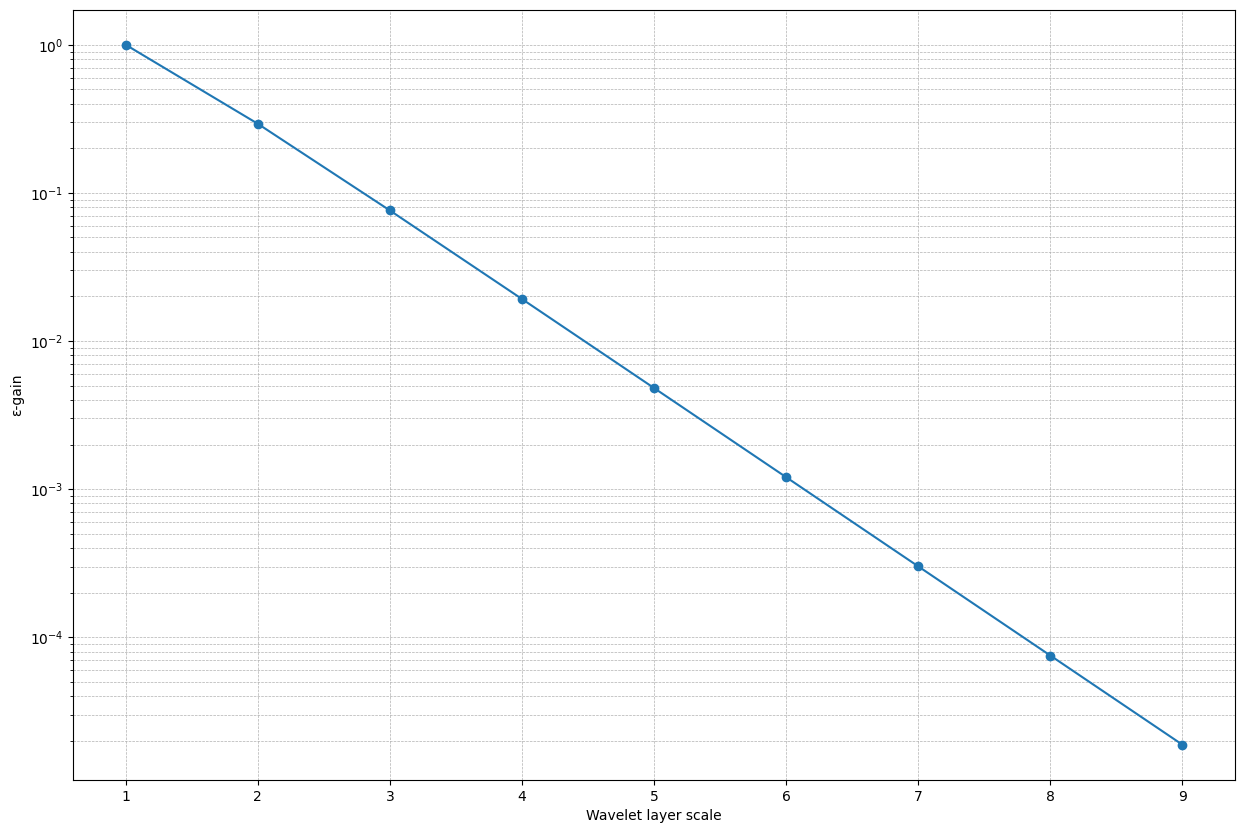

In [383]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
values = [
    1.0,
    0.29290255520821773,
    0.07612273600510898,
    0.019215280265337913,
    0.00481541308658078,
    0.0012045787090559275,
    0.0003011900307626171,
    7.530034249780196e-05,
    1.8825262803233036e-05
]

# Create a numpy array from the values
y = np.array(values)

# Create an index array for x-axis (e.g., 0, 1, 2, ...)
x = np.arange(1,len(y)+1)

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(x, y, marker='o', label='Data')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.xlabel('Wavelet layer scale')
plt.ylabel('ε-gain')
# plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [347]:
# def elemental_matrix_cal_1D(no_of_additional_scales, coordinates):

#     total_nodes = 2**(no_of_additional_scales) + 1

#     K = np.zeros((total_nodes, total_nodes))
#     M = np.zeros((total_nodes, total_nodes))
#     F = np.zeros((total_nodes,))


#     M[0:2, 0:2] = np.array([[2/3, 1/3], [1/3, 2/3]])
#     K[0:2, 0:2] = np.array([[1/2, -1/2], [-1/2, 1/2]])
#     for l in range(no_of_additional_scales):
#         for j in range(2**l):
#             M[0][2**l + j + 1] = (1/2)**(l) - ((2*j + 1)/2**(2*l+1))
#             M[2**l + j + 1][0] = (1/2)**(l) - ((2*j + 1)/2**(2*l+1))
#             M[1][2**l + j + 1] = ((2*j + 1)/2**(2*l+1))
#             M[2**l + j + 1][1] = ((2*j + 1)/2**(2*l+1))

#     diagonal_ele = 4/3
#     for i in range(2, total_nodes):
#         cur_level_i = np.ceil(np.log2(i))
#         curr_j = i
#         cur_relative_level_j = 0
 
#         while curr_j <= total_nodes:
#             if cur_relative_level_j == 0:
#                 M[i][curr_j] = diagonal_ele/(2**cur_level_i)
#                 K[i][i] = 2**cur_level_i
#             else:
#                 for u in range(2**(cur_relative_level_j-1)):
#                     M[i][curr_j - u] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[curr_j - u][i] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[i][curr_j - (2**cur_relative_level_j) + 1 + u] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#                     M[curr_j - (2**cur_relative_level_j) + 1 + u][i] = (2*u + 1)/(2**(cur_level_i + (2*cur_relative_level_j) - 1))
#             curr_j *= 2
#             cur_relative_level_j += 1
    
    
#     return M, K

        


# elemental_matrix_cal_1D(1, 1, 4)

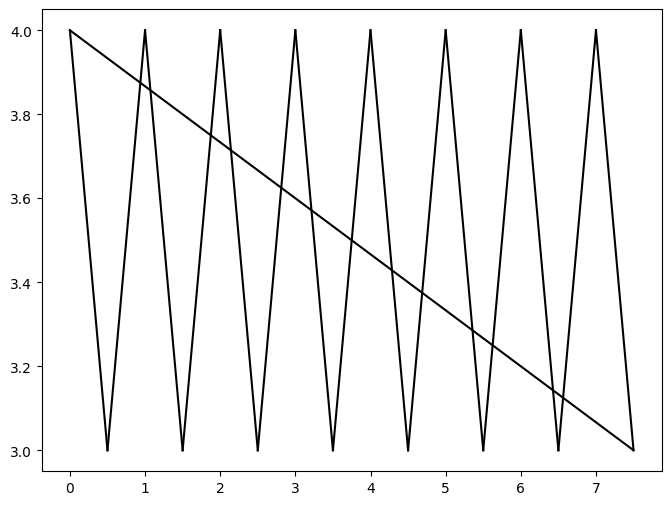

In [1]:
import matplotlib.pyplot as plt

# Define positions of points for each level
finite_element_basis = [(i, 4) for i in range(9)]  # Level a
schauder_basis = [(i + 0.5, 3) for i in range(8)]  # Level b
schauder_scale_2 = [(i, 2) for i in range(5)]      # Level c
schauder_scale_1 = [(i * 2, 1) for i in range(3)]  # Level d
schauder_scale_0 = [(4, 0)]                        # Level e

# Combine all points
points = [
    finite_element_basis,
    schauder_basis,
    schauder_scale_2,
    schauder_scale_1,
    schauder_scale_0
]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Draw lines and points
for i, (level, next_level) in enumerate(zip(points[:-1], points[1:])):
    for j, point in enumerate(level):
        # Connect each point to the points below
        if i == 0:  # From level a to b
            if j < len(next_level):
                ax.plot([point[0], next_level[j][0]], [point[1], next_level[j][1]], 'k-')
                ax.plot([point[0], next_level[j-1][0]], [point[1], next_level[j-1][1]], 'k-')

# Annotate levels
plt.show()


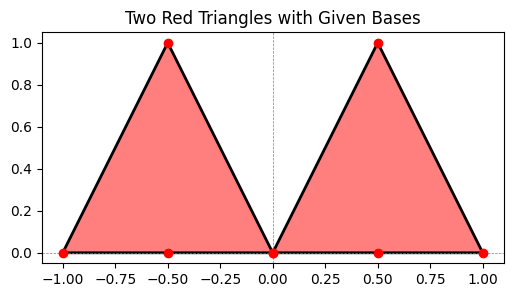

In [52]:
import matplotlib.pyplot as plt

# Define the base coordinates for the two triangles
bases = [
    [(-1, 0), (0, 0)],  # First triangle base
    [(0, 0), (1, 0)]     # Second triangle base
]

# Define the colors for each triangle (both red)
colors = ['red', 'red']

# Create the plot
fig, ax = plt.subplots(figsize=(15,3))

# Loop over the bases and create each triangle
for i, base in enumerate(bases):
    # Unpack the base coordinates
    (a1, b1), (a2, b2) = base
    
    # Calculate the midpoint of the base
    mid_x, mid_y = (a1 + a2) / 2, (b1 + b2) / 2
    
    # Calculate the height point (height of 1 unit above the midpoint)
    height_x, height_y = mid_x, mid_y + 1
    
    # Define the triangle vertices
    vertices = [(a1, b1), (a2, b2), (height_x, height_y)]
    
    # Unpack the vertices into x and y coordinates
    x, y = zip(*vertices)
    
    # Close the triangle by repeating the first vertex at the end
    x = list(x) + [x[0]]
    y = list(y) + [y[0]]
    
    # Plot the triangle with the specified color
    ax.plot(x, y, 'k-', lw=2)
    ax.fill(x, y, color=colors[i], alpha=0.5)  # Set color based on index
    ax.scatter(*zip(*vertices), color='red', zorder=3)  # Mark the vertices
    ax.scatter(mid_x, mid_y, color='red', zorder=4)  # Mark the midpoint

# # Style the plot
# ax.set_xlim(-2, 2)
# ax.set_ylim(-1, 2)
ax.axhline(0, color='gray', lw=0.5, linestyle='--')
ax.axvline(0, color='gray', lw=0.5, linestyle='--')
ax.set_aspect('equal')  # Ensure equal scaling
# ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Two Red Triangles with Given Bases")

plt.show()


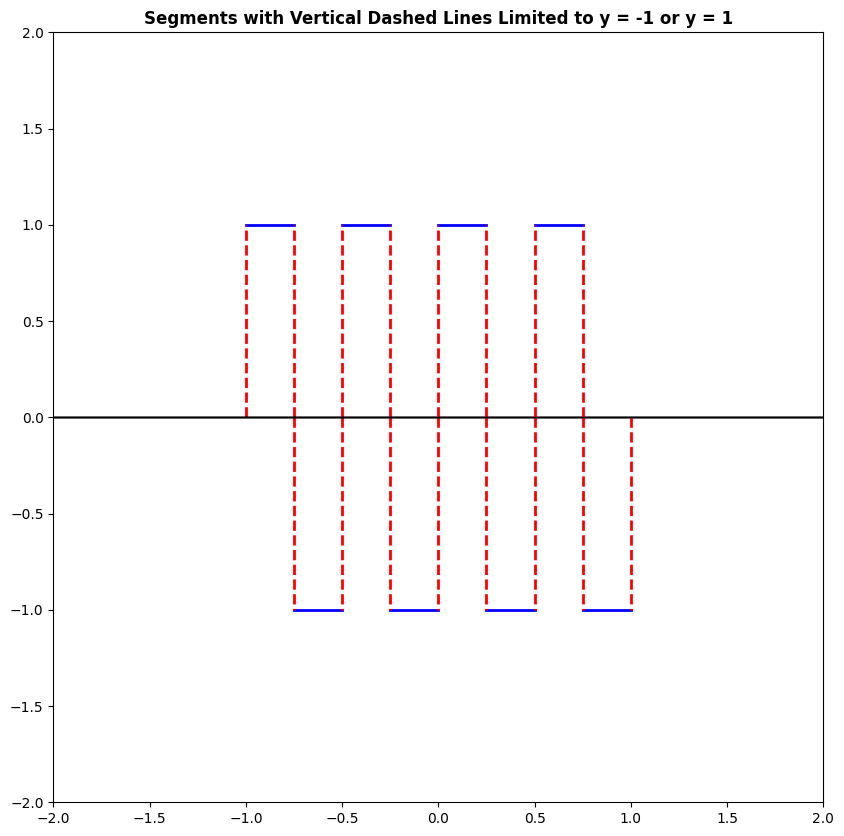

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_segments(ax, a1, b1, a2, b2):
    # Create x values within the range [a1, b1] for y = -1
    x1 = np.linspace(a1, b1, 100)
    y1 = np.full_like(x1, 1)

    # Create x values within the range [a2, b2] for y = 1
    x2 = np.linspace(a2, b2, 100)
    y2 = np.full_like(x2, -1)

    # Plot the segments
    ax.plot(x1, y1, color='blue', lw=2)
    ax.plot(x2, y2, color='blue', lw=2)

    # Add vertical dashed lines at a1 and b1, but limit their y-range
    ax.vlines(a1, 0, 1, color='red', linestyle='--', lw=2)
    ax.vlines(b1, 0, 1, color='red', linestyle='--', lw=2)
    ax.vlines(a2, 0, -1, color='red', linestyle='--', lw=2)
    ax.vlines(b2, 0, -1, color='red', linestyle='--', lw=2)

    # Mark the x-axis
    ax.axhline(0, color='black', lw=1)  # X-axis

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the segments with the given coordinates
plot_segments(ax, -1, -0.75, -0.75, -0.5)
plot_segments(ax, -0.5, -0.25, -0.25, 0)
plot_segments(ax, 0, 0.25, 0.25, 0.5)
plot_segments(ax, 0.5, 0.75, 0.75, 1)

# Style the plot
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')  # Ensure equal scaling
ax.set_title("Segments with Vertical Dashed Lines Limited to y = -1 or y = 1", fontsize=12, fontweight='bold')

plt.show()


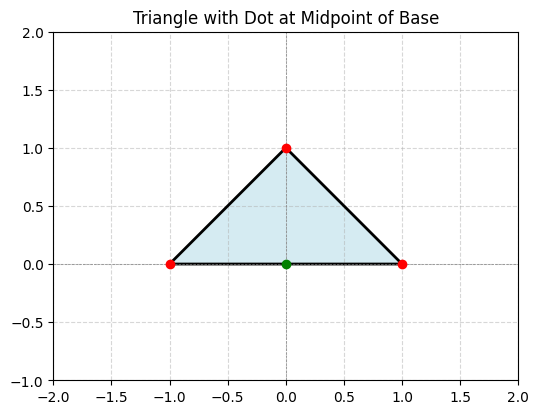

In [14]:
M, K, F, coordinates = elemental_matrix_cal_1D(4, np.array([[-1,1]]), 1)
print(coordinates.shape)
delta_u = np.zeros(F.shape)

# print(delta_u)

In [11]:
import numpy as np

# Problem parameters
epsilon = 1.0  # Diffusion coefficient
gamma = 1.0    # Mass term coefficient
f = 1.0        # Source term
h = 0.1        # Coarse grid spacing

# Number of elements
n_elements = 10

# Define the 1D coarse grid stiffness matrix K_0 and mass matrix M_0
def stiffness_matrix_coarse(epsilon, h):
    # Coarse grid stiffness matrix for a single element
    return (epsilon / h) * np.array([[1, -1], [-1, 1]])

def mass_matrix_coarse(gamma, h):
    # Coarse grid mass matrix for a single element
    return (gamma * h / 6) * np.array([[2, 1], [1, 2]])

# Assemble the global coarse grid matrices
def assemble_global_matrices(n_elements, stiffness_func, mass_func):
    # Global stiffness and mass matrices for the coarse grid
    K_0 = np.zeros((n_elements + 1, n_elements + 1))
    M_0 = np.zeros((n_elements + 1, n_elements + 1))
    
    for i in range(n_elements):
        K_e = stiffness_func(epsilon, h)
        M_e = mass_func(gamma, h)
        
        # Assembling into global matrices
        K_0[i:i+2, i:i+2] += K_e
        M_0[i:i+2, i:i+2] += M_e
    print(K_0, M_0)
    return K_0, M_0

# Multi-scale stiffness and mass matrices for each scale
def stiffness_matrix_multiscale(epsilon, h, scale):
    # Multi-scale stiffness matrix for scale k
    return (epsilon / h) * np.diag([2**(k+1) for k in range(scale + 2)])

def mass_matrix_multiscale(gamma, h, scale):
    # Multi-scale mass matrix for scale k
    return (gamma * h / 6) * np.diag([2**(k+1) for k in range(scale + 2)])

# Step 1: Form the coarse-grid operator K_0 and solve the coarse-grid problem (K_0 + M_0) U_0 = F_0
def solve_coarse_grid(K_0, M_0, F_0):
    A_0 = K_0 + M_0  # Combined system matrix
    U_0 = np.linalg.solve(A_0, F_0)
    return U_0

# Step 2: Inject one scale DOF per element and solve for the wavelet coefficient delta_u
def inject_scale_dof(K_k, M_k, F_k):
    A_k = K_k + M_k  # Combined system matrix at each scale
    delta_u = np.linalg.solve(A_k, F_k)
    return delta_u

# Step 3: Compute the termination measure for scale DOF
def compute_termination_measure(delta_u):
    return np.linalg.norm(delta_u)

def multi_scale_reconstruction(U_0, delta_us):
    # Assuming that delta_us at each scale should be interpolated or adjusted
    # to match the size of U_0
    U_final = np.copy(U_0)
    
    for delta_u in delta_us:
        if len(delta_u) < len(U_final):
            # Interpolate or pad delta_u to match the size of U_0
            delta_u_resized = np.pad(delta_u, (0, len(U_final) - len(delta_u)), mode='constant')
        elif len(delta_u) > len(U_final):
            # If delta_u is larger, slice it down to the size of U_0
            delta_u_resized = delta_u[:len(U_final)]
        else:
            delta_u_resized = delta_u
        
        # Add the wavelet correction to the final solution
        U_final += delta_u_resized
    
    return U_final

# Algorithm implementation
def multi_scale_solution(n_elements, max_scales):
    # Initialize
    F_0 = np.ones(n_elements + 1) * f  # Source term vector

    # Step 1: Solve the coarse-grid problem
    K_0, M_0 = assemble_global_matrices(n_elements, stiffness_matrix_coarse, mass_matrix_coarse)
    U_0 = solve_coarse_grid(K_0, M_0, F_0)
    # print(U_0)
    # Multi-scale correction steps
    delta_us = []
    for scale in range(1, max_scales + 1):
        # Step 2: Inject one scale DOF per element and solve for wavelet coefficients delta_u
        K_k = stiffness_matrix_multiscale(epsilon, h, scale)
        print(K_k)
        M_k = mass_matrix_multiscale(gamma, h, scale)
        print(M_k)

        F_k = np.ones(K_k.shape[0]) * f  # Adjust source term for each scale
        delta_u = inject_scale_dof(K_k, M_k, F_k)
        delta_us.append(delta_u)

        # Step 3: Check termination condition
        termination_measure = compute_termination_measure(delta_u)
        if termination_measure < 1e-6:
            print(f"Termination reached at scale {scale}")
            break

    # Step 5: Perform the element-by-element multi-scale reconstruction
    U = multi_scale_reconstruction(U_0, delta_us)

    return U

# Example of running the algorithm
max_scales = 3  # Max number of scales to consider
U = multi_scale_solution(n_elements, max_scales)

print("Solution U:", U)


[[ 10. -10.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [-10.  20. -10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. -10.  20. -10.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0. -10.  20. -10.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. -10.  20. -10.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. -10.  20. -10.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. -10.  20. -10.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0. -10.  20. -10.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. -10.  20. -10.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0. -10.  20. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0. -10.  10.]] [[0.03333333 0.01666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.01666667 0.06666667 0.01666667 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.01666667 0.06666667 0.01666667 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.   

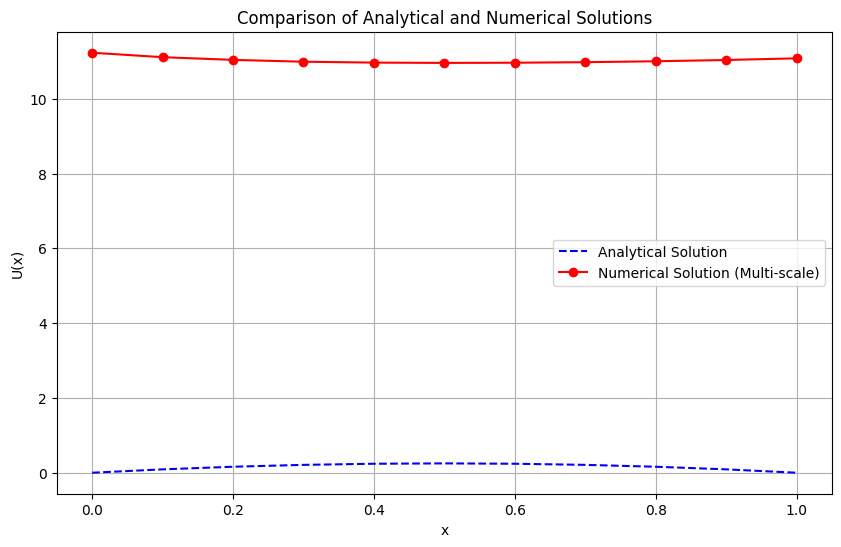

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the analytical solution (depends on your specific PDE)
def analytical_solution(x):
    # Example: 1D Poisson problem with Dirichlet boundary conditions u(0) = u(1) = 0
    return x * (1 - x)

# Assuming 'U' is the final numerical solution obtained from the multi-scale algorithm
n_points = len(U)
x_values = np.linspace(0, 1, n_points)  # Generate x-values corresponding to U

# Compute the analytical solution at the same x-values
U_analytical = analytical_solution(x_values)

# Plot both the analytical and numerical solutions
plt.figure(figsize=(10, 6))
plt.plot(x_values, U_analytical, label='Analytical Solution', linestyle='--', color='blue')
plt.plot(x_values, U, label='Numerical Solution (Multi-scale)', marker='o', color='red')

plt.title('Comparison of Analytical and Numerical Solutions')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.legend()
plt.grid(True)
plt.show()
